In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib.patches import Circle

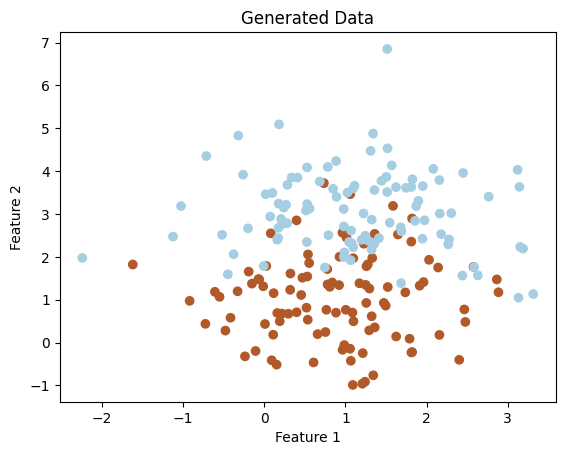

In [103]:
np.random.seed(42)
class_1 = np.random.normal(loc=[1, 1], scale=1, size=(100, 2))
class_2 = np.random.normal(loc=[1, 3], scale=1, size=(100, 2))

X = np.vstack([class_1, class_2])
y = np.hstack([np.ones(100), np.zeros(100)])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [105]:
def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [106]:
def knn(X_train, X_test, y_train, k=3):
    predictions = []
    
    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        
        indices = np.argsort(distances)[:k]
        
        neighbors_labels = [y_train[i] for i in indices]
        
        pred = np.bincount(neighbors_labels).argmax()
        
        predictions.append(pred)
        
    return predictions

In [107]:
y_hat = knn(X_train, X_test, y_train, k=5)

In [108]:
accuracy_score(y_test, y_hat)

0.92

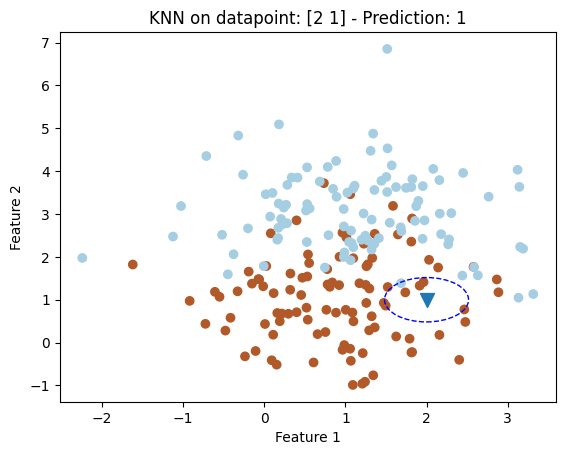

In [180]:
new_data_point = np.array([[2,1]])

prediction = knn(X_train, new_data_point, y_train, k=5)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')
plt.scatter(new_data_point[:, 0], new_data_point[:, 1], marker='v', s=100)

distances = np.linalg.norm(X - new_data_point, axis=1)
indices = np.argsort(distances)[:k]

# Calculate the radius based on the maximum distance among k-nearest neighbors
radius = np.max(distances[indices])

# Draw a circle around new_data_point encompassing the k-nearest neighbors
circle = Circle((new_data_point[:, 0], new_data_point[:, 1]), radius, fill=False, color='blue', linestyle='dashed')
plt.gca().add_patch(circle)

plt.title(f'KNN on datapoint: {new_data_point[0]} - Prediction: {prediction[0]}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

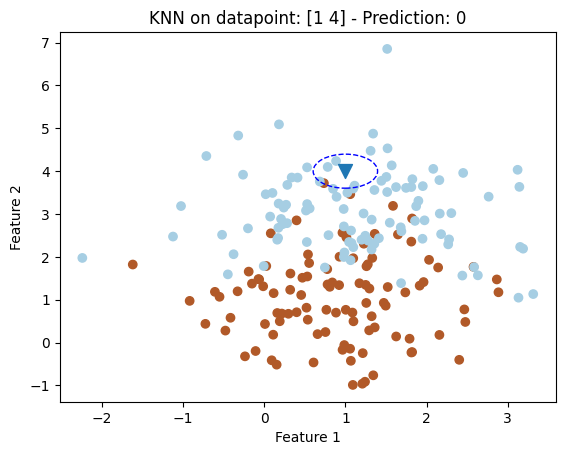

In [191]:
new_data_point = np.array([[1,4]])

prediction = knn(X_train, new_data_point, y_train, k=5)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')
plt.scatter(new_data_point[:, 0], new_data_point[:, 1], marker='v', s=100)

distances = np.linalg.norm(X - new_data_point, axis=1)
indices = np.argsort(distances)[:k]

# Calculate the radius based on the maximum distance among k-nearest neighbors
radius = np.max(distances[indices])

# Draw a circle around new_data_point encompassing the k-nearest neighbors
circle = Circle((new_data_point[:, 0], new_data_point[:, 1]), radius, fill=False, color='blue', linestyle='dashed')
plt.gca().add_patch(circle)

plt.title(f'KNN on datapoint: {new_data_point[0]} - Prediction: {prediction[0]}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()